# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

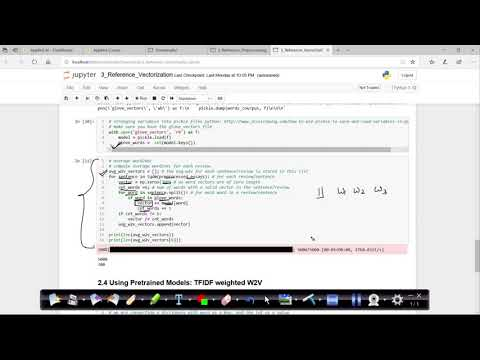

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [4]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [5]:
 import nltk
 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akash.ragothu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

## 1.1 Loading Data

In [7]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas
data = pandas.read_csv('preprocessed_data.csv', nrows=10000)

In [8]:
print(data.shape)
data.head(2)

(10000, 9)


school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

  clean_categories                 clean_subcategories  \
0     math_science  appliedsciences health_lifescience   
1     specialneeds                        specialneeds   

                                               essay   price  
0  i fortunate enough use fairy tale stem kits cl...  725.05  
1  imagine 8 9 years old you third grade classroo...  213.03

In [9]:
# write your code in following steps for task 1
# 1. calculate sentiment scores for the essay feature 
sentiment_list =[]
for sentence in data["essay"]:
    sentiment_list.append(sid.polarity_scores(sentence)["compound"])

#print(sentiment_list)
data["essay_sentimental_score"] = sentiment_list  
data.head(2)
    


school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

  clean_categories                 clean_subcategories  \
0     math_science  appliedsciences health_lifescience   
1     specialneeds                        specialneeds   

                                               essay   price  \
0  i fortunate enough use fairy tale stem kits cl...  725.05   
1  imagine 8 9 years old you third grade classroo...  213.03   

   essay_sentimental_score  
0                   0.9867  
1                   0.9897

In [10]:
# 2. Split your data.
from sklearn.model_selection import train_test_split

data_set1 = data
data_set2 = data.copy()

#Data Set1:
Y = data.project_is_approved
# Split data set into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split( data_set1, Y, test_size=0.2, random_state=12)
print("X_train1 (60%):", X_train1.shape)
print("X_test1 (20%):",X_train1.shape)

#Data Set2:
Y = data.project_is_approved
# Split data set into train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split( data_set2, Y, test_size=0.2, random_state=12)
print("X_train2 (60%):", X_train2.shape)
print("X_test2 (20%):",X_test2.shape)

X_train1.head()
X_train1['essay_sentimental_score'].shape

X_train1 (60%): (8000, 10)
X_test1 (20%): (8000, 10)
X_train2 (60%): (8000, 10)
X_test2 (20%): (2000, 10)


(8000,)

# Preparing Data set1: Vectorization,standardization

# TFIDF vectorization: Data set1

In [11]:
# 3. perform tfidf vectorization of text data.

preprocessed_essays_Xtrain1 = X_train1['essay'].values
preprocessed_essays_Xtest1 = X_test1['essay'].values
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_Xtrain1 = vectorizer.fit_transform(preprocessed_essays_Xtrain1)
text_tfidf_Xtest1 = vectorizer.transform(preprocessed_essays_Xtest1)

print("Shape of matrix after one hot encodig (Xtrain1): ",text_tfidf_Xtrain1.shape)
print("Shape of matrix after one hot encodig (Xtest1): ",text_tfidf_Xtest1.shape)

#print(type(text_tfidf_Xtrain1))

Shape of matrix after one hot encodig (Xtrain1):  (8000, 5619)
Shape of matrix after one hot encodig (Xtest1):  (2000, 5619)


# Encoding of categorical features: Data set1

In [12]:
# 5. perform encoding of categorical features.

# School_state
vectorizer = CountVectorizer(binary=True)
school_state_ohe_Xtrain1 = vectorizer.fit_transform(X_train1['school_state'].values)
school_state_ohe_Xtest1 = vectorizer.transform(X_test1['school_state'].values)

print("Shape of matrix after one hot encoding (Xtrain1: school_state): ",school_state_ohe_Xtrain1.shape)
print("Shape of matrix after one hot encoding (Xtest1: school_state): ",school_state_ohe_Xtest1.shape)

# teacher_prefix
vectorizer = CountVectorizer(binary=True)
teacher_prefix_ohe_Xtrain1 = vectorizer.fit_transform(X_train1['teacher_prefix'].values)
teacher_prefix_ohe_Xtest1 = vectorizer.transform(X_test1['teacher_prefix'].values)

print("Shape of matrix after one hot encoding (Xtrain1:teacher_prefix): ",teacher_prefix_ohe_Xtrain1.shape)
print("Shape of matrix after one hot encoding (Xtest1:teacher_prefix) ",teacher_prefix_ohe_Xtest1.shape)

# project_grade_category
vectorizer = CountVectorizer(binary=True)
project_grade_category_ohe_Xtrain1 = vectorizer.fit_transform(X_train1['project_grade_category'].values)
project_grade_category_ohe_Xtest1 = vectorizer.transform(X_test1['project_grade_category'].values)

print("Shape of matrix after one hot encoding (Xtrain1:project_grade_category): ",project_grade_category_ohe_Xtrain1.shape)
print("Shape of matrix after one hot encoding (Xtest1:project_grade_category) ",project_grade_category_ohe_Xtest1.shape)

#clean_categories
vectorizer = CountVectorizer(binary=True)
clean_categories_ohe_Xtrain1 = vectorizer.fit_transform(X_train1['clean_categories'].values)
clean_categories_ohe_Xtest1 = vectorizer.transform(X_test1['clean_categories'].values)

print("Shape of matrix after one hot encoding (Xtrain1: clean_categories): ",clean_categories_ohe_Xtrain1.shape)
print("Shape of matrix after one hot encoding (Xtest1: clean_categories) ",clean_categories_ohe_Xtest1.shape)

#clean_subcategories
vectorizer = CountVectorizer(binary=True)
clean_subcategories_ohe_Xtrain1 = vectorizer.fit_transform(X_train1['clean_subcategories'].values)
clean_subcategories_ohe_Xtest1 = vectorizer.transform(X_test1['clean_subcategories'].values)

print("Shape of matrix after one hot encoding (Xtrain1:clean_subcategories): ",clean_subcategories_ohe_Xtrain1.shape)
print("Shape of matrix after one hot encoding (Xtest1:clean_subcategories) ",clean_subcategories_ohe_Xtest1.shape)

Shape of matrix after one hot encoding (Xtrain1: school_state):  (8000, 51)
Shape of matrix after one hot encoding (Xtest1: school_state):  (2000, 51)
Shape of matrix after one hot encoding (Xtrain1:teacher_prefix):  (8000, 5)
Shape of matrix after one hot encoding (Xtest1:teacher_prefix)  (2000, 5)
Shape of matrix after one hot encoding (Xtrain1:project_grade_category):  (8000, 4)
Shape of matrix after one hot encoding (Xtest1:project_grade_category)  (2000, 4)
Shape of matrix after one hot encoding (Xtrain1: clean_categories):  (8000, 7)
Shape of matrix after one hot encoding (Xtest1: clean_categories)  (2000, 7)
Shape of matrix after one hot encoding (Xtrain1:clean_subcategories):  (8000, 28)
Shape of matrix after one hot encoding (Xtest1:clean_subcategories)  (2000, 28)


# Encoding of numerical features: Data set1

In [13]:
# 6. perform standardizing numerical features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Price
scaler = StandardScaler()
standardized_price_Xtrain1 = scaler.fit_transform(X_train1['price'].values.reshape(-1, 1))
standardized_price_Xtest1 = scaler.transform(X_test1['price'].values.reshape(-1, 1))
scaler = MinMaxScaler()
nrm_price_Xtrain1=scaler.fit_transform(standardized_price_Xtrain1)
nrm_price_Xtest1=scaler.transform(standardized_price_Xtest1)

#print(nrm_price_Xtrain1.shape)
#print(type(nrm_price_Xtrain1))
#print(nrm_price_Xtrain1[:5])
#project_data['nrm_price_Xtrain1'].head()

# teacher_number_of_previously_posted_projects

scaler = StandardScaler()
standardized_teacher_number_of_previously_posted_projects_Xtrain1 = scaler.fit_transform(X_train1['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
standardized_teacher_number_of_previously_posted_projects_Xtest1 = scaler.transform(X_test1['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
scaler = MinMaxScaler()
nrm_teacher_number_of_previously_posted_projects_Xtrain1=scaler.fit_transform(standardized_teacher_number_of_previously_posted_projects_Xtrain1)
nrm_teacher_number_of_previously_posted_projects_Xtest1=scaler.transform(standardized_teacher_number_of_previously_posted_projects_Xtest1)

# essay_sentimental_score

scaler = StandardScaler()
standardized_essay_sentimental_score_Xtrain1 = scaler.fit_transform(X_train1['essay_sentimental_score'].values.reshape(-1, 1))
standardized_essay_sentimental_score_Xtest1 = scaler.transform(X_test1['essay_sentimental_score'].values.reshape(-1, 1))
scaler = MinMaxScaler()
nrm_essay_sentimental_score_Xtrain1=scaler.fit_transform(standardized_essay_sentimental_score_Xtrain1)
nrm_essay_sentimental_score_Xtest1=scaler.transform(standardized_essay_sentimental_score_Xtest1)




# Stack up all the features : Data set1

In [14]:
# 7. For task 1 set 1 stack up all the features

#Xtrain of data set1

#convert school_state_ohe sparse matrix to dense
#print(school_state_ohe_Xtrain1.shape)
column_names = [ "school_ohe_"+str(i) for i in range(school_state_ohe_Xtrain1.shape[1])]
#print(column_names)
school_state_ohe_Xtrain1_df = pd.DataFrame(school_state_ohe_Xtrain1.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
school_state_ohe_Xtrain1_df.head(2)


#convert teacher_prefix_ohe_Xtrain1 sparse matrix to dense
#print(teacher_prefix_ohe_Xtrain1.shape)
column_names = [ "teacher_prefix_ohe_"+str(i) for i in range(teacher_prefix_ohe_Xtrain1.shape[1])]
#print(column_names)
teacher_prefix_ohe_Xtrain1_df = pd.DataFrame(teacher_prefix_ohe_Xtrain1.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
teacher_prefix_ohe_Xtrain1_df.head(2)


#convert project_grade_category_ohe_Xtrain1 sparse matrix to dense
#print(project_grade_category_ohe_Xtrain1.shape)
column_names = [ "project_grade_category_ohe_"+str(i) for i in range(project_grade_category_ohe_Xtrain1.shape[1])]
#print(column_names)
project_grade_category_ohe_Xtrain1_df = pd.DataFrame(project_grade_category_ohe_Xtrain1.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
project_grade_category_ohe_Xtrain1_df.head(2)

#convert clean_categories_ohe_Xtrain1 sparse matrix to dense
#print(clean_categories_ohe_Xtrain1.shape)
column_names = [ "clean_categories_ohe_"+str(i) for i in range(clean_categories_ohe_Xtrain1.shape[1])]
#print(column_names)
clean_categories_ohe_Xtrain1_df = pd.DataFrame(clean_categories_ohe_Xtrain1.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
clean_categories_ohe_Xtrain1_df.head(2)

#convert clean_subcategories_ohe_Xtrain1 sparse matrix to dense
#print(clean_subcategories_ohe_Xtrain1.shape)
column_names = [ "clean_subcategories_ohe_"+str(i) for i in range(clean_subcategories_ohe_Xtrain1.shape[1])]
#print(column_names)
clean_subcategories_ohe_Xtrain1_df = pd.DataFrame(clean_subcategories_ohe_Xtrain1.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
clean_subcategories_ohe_Xtrain1_df.head(2)

#convert text_tfidf sparse matrix to dense
#print(text_tfidf.shape)
column_names = [ "text_tfidf"+str(i) for i in range(text_tfidf_Xtrain1.shape[1])]
#print(column_names)
text_tfidf_Xtrain1_df = pd.DataFrame(text_tfidf_Xtrain1.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
text_tfidf_Xtrain1_df.head(2)

#sent_score =X_train1.essay_sentimental_score

X_train1_df = pd.concat([school_state_ohe_Xtrain1_df,teacher_prefix_ohe_Xtrain1_df,project_grade_category_ohe_Xtrain1_df,
                       pd.DataFrame(nrm_teacher_number_of_previously_posted_projects_Xtrain1,columns =["nrm_teacher_number_of_previously_posted_projects"]),                       
                       clean_categories_ohe_Xtrain1_df,clean_subcategories_ohe_Xtrain1_df,
                       text_tfidf_Xtrain1_df,
                       pd.DataFrame(nrm_price_Xtrain1,columns =["nrm_price"]),
                       pd.DataFrame(nrm_essay_sentimental_score_Xtrain1,columns =["nrm_essay_sentimental_score"])],axis=1)
#project_grade_category_ohe_df.head(2)
print("Xtrain of Data Set 1 ")
print("-"*50)
print("size: ",X_train1_df.shape)
X_train1_df.head(2)

#print(X_train1_df.shape)

Xtrain of Data Set 1 
--------------------------------------------------
size:  (8000, 5717)


school_ohe_0  school_ohe_1  school_ohe_2  school_ohe_3  school_ohe_4  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   school_ohe_5  school_ohe_6  school_ohe_7  school_ohe_8  school_ohe_9  \
0             0             0             0             0             0   
1             0             0             0             0             0   

              ...               text_tfidf5611  text_tfidf5612  \
0             ...                          0.0             0.0   
1             ...                          0.0             0.0   

   text_tfidf5613  text_tfidf5614  text_tfidf5615  text_tfidf5616  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   

   text_tfidf5617  text_tfidf5618  nrm_price  nrm_essay_sentimental_score  
0             0.0             0.0   0.057476                     0.997536  
1             0.0             0.0   0.013664                     0.995122  

[2 rows x 5717 columns]

In [15]:
# 7. For task 1 set 1 stack up all the features

#Xtest of data set1

#convert school_state_ohe sparse matrix to dense
#print(school_state_ohe_Xtest1.shape)
column_names = [ "school_ohe_"+str(i) for i in range(school_state_ohe_Xtest1.shape[1])]
#print(column_names)
school_state_ohe_Xtest1_df = pd.DataFrame(school_state_ohe_Xtest1.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
school_state_ohe_Xtest1_df.head(2)


#convert teacher_prefix_ohe_Xtest1 sparse matrix to dense
#print(teacher_prefix_ohe_Xtest1.shape)
column_names = [ "teacher_prefix_ohe_"+str(i) for i in range(teacher_prefix_ohe_Xtest1.shape[1])]
#print(column_names)
teacher_prefix_ohe_Xtest1_df = pd.DataFrame(teacher_prefix_ohe_Xtest1.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
teacher_prefix_ohe_Xtest1_df.head(2)


#convert project_grade_category_ohe_Xtest1 sparse matrix to dense
#print(project_grade_category_ohe_Xtest1.shape)
column_names = [ "project_grade_category_ohe_"+str(i) for i in range(project_grade_category_ohe_Xtest1.shape[1])]
#print(column_names)
project_grade_category_ohe_Xtest1_df = pd.DataFrame(project_grade_category_ohe_Xtest1.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
project_grade_category_ohe_Xtest1_df.head(2)

#convert clean_categories_ohe_Xtest1 sparse matrix to dense
#print(clean_categories_ohe_Xtest1.shape)
column_names = [ "clean_categories_ohe_"+str(i) for i in range(clean_categories_ohe_Xtest1.shape[1])]
#print(column_names)
clean_categories_ohe_Xtest1_df = pd.DataFrame(clean_categories_ohe_Xtest1.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
clean_categories_ohe_Xtest1_df.head(2)

#convert clean_subcategories_ohe_Xtest1 sparse matrix to dense
#print(clean_subcategories_ohe_Xtest1.shape)
column_names = [ "clean_subcategories_ohe_"+str(i) for i in range(clean_subcategories_ohe_Xtest1.shape[1])]
#print(column_names)
clean_subcategories_ohe_Xtest1_df = pd.DataFrame(clean_subcategories_ohe_Xtest1.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
clean_subcategories_ohe_Xtest1_df.head(2)

#convert text_tfidf sparse matrix to dense
#print(text_tfidf.shape)
column_names = [ "text_tfidf"+str(i) for i in range(text_tfidf_Xtest1.shape[1])]
#print(column_names)
text_tfidf_Xtest1_df = pd.DataFrame(text_tfidf_Xtest1.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
text_tfidf_Xtest1_df.head(2)

#sent_score =X_train1.essay_sentimental_score

X_test1_df = pd.concat([school_state_ohe_Xtest1_df,teacher_prefix_ohe_Xtest1_df,project_grade_category_ohe_Xtest1_df,
                       pd.DataFrame(nrm_teacher_number_of_previously_posted_projects_Xtest1,columns =["nrm_teacher_number_of_previously_posted_projects"]),                       
                       clean_categories_ohe_Xtest1_df,clean_subcategories_ohe_Xtest1_df,
                       text_tfidf_Xtest1_df,
                       pd.DataFrame(nrm_price_Xtest1,columns =["nrm_price"]),
                       pd.DataFrame(nrm_essay_sentimental_score_Xtest1,columns =["nrm_essay_sentimental_score"])],axis=1)
#project_grade_category_ohe_df.head(2)
print("Xtest of Data Set 1 ")
print("-"*50)
print("size: ",X_test1_df.shape)
X_train1_df.head(2)

#print(X_train1_df.shape)

Xtest of Data Set 1 
--------------------------------------------------
size:  (2000, 5717)


school_ohe_0  school_ohe_1  school_ohe_2  school_ohe_3  school_ohe_4  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   school_ohe_5  school_ohe_6  school_ohe_7  school_ohe_8  school_ohe_9  \
0             0             0             0             0             0   
1             0             0             0             0             0   

              ...               text_tfidf5611  text_tfidf5612  \
0             ...                          0.0             0.0   
1             ...                          0.0             0.0   

   text_tfidf5613  text_tfidf5614  text_tfidf5615  text_tfidf5616  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   

   text_tfidf5617  text_tfidf5618  nrm_price  nrm_essay_sentimental_score  
0             0.0             0.0   0.057476                     0.997536  
1             0.0             0.0   0.013664                     0.995122  

[2 rows x 5717 columns]

# Preparing Data set2: Vectorization,standardization

# TFIDF W2V Vectorization: Data set2

In [16]:
# 4. perform tfidf w2v vectorization of text data.

preprocessed_essays_Xtrain2 = X_train2['essay'].values
preprocessed_essays_Xtest2 = X_test2['essay'].values
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_Xtrain2)

# we are converting a dictionary with word as a key, and the tf-idf as a value

dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.

def get_tfidf_w2v(essays):
    
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors

text_tfidf_w2v_Xtrain2 = np.array(get_tfidf_w2v(preprocessed_essays_Xtrain2))
text_tfidf_w2v_Xtest2 = np.array(get_tfidf_w2v(preprocessed_essays_Xtest2))


#print(len(text_tfidf_w2v_Xtrain2))
#print(len(text_tfidf_w2v_Xtrain2[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:04<00:00, 403.53it/s]


# Encoding of categorical features: Data set2

In [17]:
# 5. perform encoding of categorical features.

# School_state
vectorizer = CountVectorizer(binary=True)
school_state_ohe_Xtrain2 = vectorizer.fit_transform(X_train2['school_state'].values)
school_state_ohe_Xtest2 = vectorizer.transform(X_test2['school_state'].values)

print("Shape of matrix after one hot encoding (Xtrain2: school_state): ",school_state_ohe_Xtrain2.shape)
print("Shape of matrix after one hot encoding (Xtest2: school_state): ",school_state_ohe_Xtest2.shape)

# teacher_prefix
vectorizer = CountVectorizer(binary=True)
teacher_prefix_ohe_Xtrain2 = vectorizer.fit_transform(X_train2['teacher_prefix'].values)
teacher_prefix_ohe_Xtest2 = vectorizer.transform(X_test2['teacher_prefix'].values)

print("Shape of matrix after one hot encoding (Xtrain2:teacher_prefix): ",teacher_prefix_ohe_Xtrain2.shape)
print("Shape of matrix after one hot encoding (Xtest2:teacher_prefix) ",teacher_prefix_ohe_Xtest2.shape)

# project_grade_category
vectorizer = CountVectorizer(binary=True)
project_grade_category_ohe_Xtrain2 = vectorizer.fit_transform(X_train2['project_grade_category'].values)
project_grade_category_ohe_Xtest2 = vectorizer.transform(X_test2['project_grade_category'].values)

print("Shape of matrix after one hot encoding (Xtrain2:project_grade_category): ",project_grade_category_ohe_Xtrain2.shape)
print("Shape of matrix after one hot encoding (Xtest2:project_grade_category) ",project_grade_category_ohe_Xtest2.shape)

#clean_categories
vectorizer = CountVectorizer(binary=True)
clean_categories_ohe_Xtrain2 = vectorizer.fit_transform(X_train2['clean_categories'].values)
clean_categories_ohe_Xtest2 = vectorizer.transform(X_test2['clean_categories'].values)

print("Shape of matrix after one hot encoding (Xtrain2: clean_categories): ",clean_categories_ohe_Xtrain2.shape)
print("Shape of matrix after one hot encoding (Xtest2: clean_categories) ",clean_categories_ohe_Xtest2.shape)

#clean_subcategories
vectorizer = CountVectorizer(binary=True)
clean_subcategories_ohe_Xtrain2 = vectorizer.fit_transform(X_train2['clean_subcategories'].values)
clean_subcategories_ohe_Xtest2 = vectorizer.transform(X_test2['clean_subcategories'].values)

print("Shape of matrix after one hot encoding (Xtrain2:clean_subcategories): ",clean_subcategories_ohe_Xtrain2.shape)
print("Shape of matrix after one hot encoding (Xtest2:clean_subcategories) ",clean_subcategories_ohe_Xtest2.shape)

Shape of matrix after one hot encoding (Xtrain2: school_state):  (8000, 51)
Shape of matrix after one hot encoding (Xtest2: school_state):  (2000, 51)
Shape of matrix after one hot encoding (Xtrain2:teacher_prefix):  (8000, 5)
Shape of matrix after one hot encoding (Xtest2:teacher_prefix)  (2000, 5)
Shape of matrix after one hot encoding (Xtrain2:project_grade_category):  (8000, 4)
Shape of matrix after one hot encoding (Xtest2:project_grade_category)  (2000, 4)
Shape of matrix after one hot encoding (Xtrain2: clean_categories):  (8000, 7)
Shape of matrix after one hot encoding (Xtest2: clean_categories)  (2000, 7)
Shape of matrix after one hot encoding (Xtrain2:clean_subcategories):  (8000, 28)
Shape of matrix after one hot encoding (Xtest2:clean_subcategories)  (2000, 28)


# Encoding of numerical features: Data set2

In [21]:
# 6. perform standardizing numerical features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Price
scaler = StandardScaler()
standardized_price_Xtrain2 = scaler.fit_transform(X_train2['price'].values.reshape(-1, 1))
standardized_price_Xtest2 = scaler.transform(X_test2['price'].values.reshape(-1, 1))
scaler = MinMaxScaler()
nrm_price_Xtrain2=scaler.fit_transform(standardized_price_Xtrain2)
nrm_price_Xtest2=scaler.transform(standardized_price_Xtest2)

print(nrm_price_Xtrain2.shape)
#print(type(nrm_price_Xtrain2))
#print(nrm_price_Xtrain2[:5])
#project_data['nrm_price_Xtrain2'].head()

# teacher_number_of_previously_posted_projects

scaler = StandardScaler()
standardized_teacher_number_of_previously_posted_projects_Xtrain2 = scaler.fit_transform(X_train2['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
standardized_teacher_number_of_previously_posted_projects_Xtest2 = scaler.transform(X_test2['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
scaler = MinMaxScaler()
nrm_teacher_number_of_previously_posted_projects_Xtrain2=scaler.fit_transform(standardized_teacher_number_of_previously_posted_projects_Xtrain2)
nrm_teacher_number_of_previously_posted_projects_Xtest2=scaler.transform(standardized_teacher_number_of_previously_posted_projects_Xtest2)

# essay_sentimental_score

scaler = StandardScaler()
standardized_essay_sentimental_score_Xtrain2 = scaler.fit_transform(X_train2['essay_sentimental_score'].values.reshape(-1, 1))
standardized_essay_sentimental_score_Xtest2 = scaler.transform(X_test2['essay_sentimental_score'].values.reshape(-1, 1))
scaler = MinMaxScaler()
nrm_essay_sentimental_score_Xtrain2=scaler.fit_transform(standardized_essay_sentimental_score_Xtrain2)
nrm_essay_sentimental_score_Xtest2=scaler.transform(standardized_essay_sentimental_score_Xtest2)




(8000, 1)


# Stack up all the features : Data set2

In [25]:
# 7. For task 2 set 2 stack up all the features

#Xtrain of data set2

#convert school_state_ohe sparse matrix to dense
#print(school_state_ohe_Xtrain2.shape)
column_names = [ "school_ohe_"+str(i) for i in range(school_state_ohe_Xtrain2.shape[1])]
#print(column_names)
school_state_ohe_Xtrain2_df = pd.DataFrame(school_state_ohe_Xtrain2.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
school_state_ohe_Xtrain2_df.head(2)


#convert teacher_prefix_ohe_Xtrain2 sparse matrix to dense
#print(teacher_prefix_ohe_Xtrain2.shape)
column_names = [ "teacher_prefix_ohe_"+str(i) for i in range(teacher_prefix_ohe_Xtrain2.shape[1])]
#print(column_names)
teacher_prefix_ohe_Xtrain2_df = pd.DataFrame(teacher_prefix_ohe_Xtrain2.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
teacher_prefix_ohe_Xtrain2_df.head(2)


#convert project_grade_category_ohe_Xtrain2 sparse matrix to dense
#print(project_grade_category_ohe_Xtrain2.shape)
column_names = [ "project_grade_category_ohe_"+str(i) for i in range(project_grade_category_ohe_Xtrain2.shape[1])]
#print(column_names)
project_grade_category_ohe_Xtrain2_df = pd.DataFrame(project_grade_category_ohe_Xtrain2.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
project_grade_category_ohe_Xtrain2_df.head(2)

#convert clean_categories_ohe_Xtrain2 sparse matrix to dense
#print(clean_categories_ohe_Xtrain2.shape)
column_names = [ "clean_categories_ohe_"+str(i) for i in range(clean_categories_ohe_Xtrain2.shape[1])]
#print(column_names)
clean_categories_ohe_Xtrain2_df = pd.DataFrame(clean_categories_ohe_Xtrain2.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
clean_categories_ohe_Xtrain2_df.head(2)

#convert clean_subcategories_ohe_Xtrain2 sparse matrix to dense
#print(clean_subcategories_ohe_Xtrain2.shape)
column_names = [ "clean_subcategories_ohe_"+str(i) for i in range(clean_subcategories_ohe_Xtrain2.shape[1])]
#print(column_names)
clean_subcategories_ohe_Xtrain2_df = pd.DataFrame(clean_subcategories_ohe_Xtrain2.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
clean_subcategories_ohe_Xtrain2_df.head(2)

#convert text_tfidf sparse matrix to dense
#print(text_tfidf.shape)
column_names = [ "text_tfidf"+str(i) for i in range(text_tfidf_w2v_Xtrain2.shape[1])]
#print(column_names)
text_tfidf_w2v_Xtrain2_df = pd.DataFrame(text_tfidf_w2v_Xtrain2,columns =column_names)
#school_state_ohe_df.column = column_names
text_tfidf_w2v_Xtrain2_df.head(2)

#sent_score =X_train2.essay_sentimental_score

X_train2_df = pd.concat([school_state_ohe_Xtrain2_df,teacher_prefix_ohe_Xtrain2_df,project_grade_category_ohe_Xtrain2_df,
                       pd.DataFrame(nrm_teacher_number_of_previously_posted_projects_Xtrain2,columns =["nrm_teacher_number_of_previously_posted_projects"]),                       
                       clean_categories_ohe_Xtrain2_df,clean_subcategories_ohe_Xtrain2_df,
                       text_tfidf_w2v_Xtrain2_df,
                       pd.DataFrame(nrm_price_Xtrain2,columns =["nrm_price"]),
                       pd.DataFrame(nrm_essay_sentimental_score_Xtrain2,columns =["nrm_essay_sentimental_score"])],axis=1)
#project_grade_category_ohe_df.head(2)
print("Xtrain of Data Set 2 ")
print("-"*50)
print("size: ",X_train2_df.shape)
X_train2_df.head(2)

#print(X_train2_df.shape)

Xtrain of Data Set 2 
--------------------------------------------------
size:  (8000, 398)


school_ohe_0  school_ohe_1  school_ohe_2  school_ohe_3  school_ohe_4  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   school_ohe_5  school_ohe_6  school_ohe_7  school_ohe_8  school_ohe_9  \
0             0             0             0             0             0   
1             0             0             0             0             0   

              ...               text_tfidf292  text_tfidf293  text_tfidf294  \
0             ...                    0.004161      -0.014986       0.062333   
1             ...                   -0.207442      -0.067349       0.070186   

   text_tfidf295  text_tfidf296  text_tfidf297  text_tfidf298  text_tfidf299  \
0       0.082496       0.019540       0.267045       0.130154       0.014083   
1      -0.019640      -0.185976       0.177698       0.132500       0.027462   

   nrm_price  nrm_essay_sentimental_score  
0   0.057476                     0.997536  
1   0.013664                     0.995122  

[2 rows x 398 columns]

In [26]:
# 7. For task 2 set 2 stack up all the features

#Xtrain of data set2

#convert school_state_ohe sparse matrix to dense
#print(school_state_ohe_Xtest2.shape)
column_names = [ "school_ohe_"+str(i) for i in range(school_state_ohe_Xtest2.shape[1])]
#print(column_names)
school_state_ohe_Xtest2_df = pd.DataFrame(school_state_ohe_Xtest2.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
school_state_ohe_Xtest2_df.head(2)


#convert teacher_prefix_ohe_Xtest2 sparse matrix to dense
#print(teacher_prefix_ohe_Xtest2.shape)
column_names = [ "teacher_prefix_ohe_"+str(i) for i in range(teacher_prefix_ohe_Xtest2.shape[1])]
#print(column_names)
teacher_prefix_ohe_Xtest2_df = pd.DataFrame(teacher_prefix_ohe_Xtest2.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
teacher_prefix_ohe_Xtest2_df.head(2)


#convert project_grade_category_ohe_Xtest2 sparse matrix to dense
#print(project_grade_category_ohe_Xtest2.shape)
column_names = [ "project_grade_category_ohe_"+str(i) for i in range(project_grade_category_ohe_Xtest2.shape[1])]
#print(column_names)
project_grade_category_ohe_Xtest2_df = pd.DataFrame(project_grade_category_ohe_Xtest2.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
project_grade_category_ohe_Xtest2_df.head(2)

#convert clean_categories_ohe_Xtest2 sparse matrix to dense
#print(clean_categories_ohe_Xtest2.shape)
column_names = [ "clean_categories_ohe_"+str(i) for i in range(clean_categories_ohe_Xtest2.shape[1])]
#print(column_names)
clean_categories_ohe_Xtest2_df = pd.DataFrame(clean_categories_ohe_Xtest2.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
clean_categories_ohe_Xtest2_df.head(2)

#convert clean_subcategories_ohe_Xtest2 sparse matrix to dense
#print(clean_subcategories_ohe_Xtest2.shape)
column_names = [ "clean_subcategories_ohe_"+str(i) for i in range(clean_subcategories_ohe_Xtest2.shape[1])]
#print(column_names)
clean_subcategories_ohe_Xtest2_df = pd.DataFrame(clean_subcategories_ohe_Xtest2.todense(),columns =column_names)
#school_state_ohe_df.column = column_names
clean_subcategories_ohe_Xtest2_df.head(2)

#convert text_tfidf sparse matrix to dense
#print(text_tfidf.shape)
column_names = [ "text_tfidf"+str(i) for i in range(text_tfidf_w2v_Xtest2.shape[1])]
#print(column_names)
text_tfidf_w2v_Xtest2_df = pd.DataFrame(text_tfidf_w2v_Xtest2,columns =column_names)
#school_state_ohe_df.column = column_names
text_tfidf_w2v_Xtest2_df.head(2)

#sent_score =X_test2.essay_sentimental_score

X_test2_df = pd.concat([school_state_ohe_Xtest2_df,teacher_prefix_ohe_Xtest2_df,project_grade_category_ohe_Xtest2_df,
                       pd.DataFrame(nrm_teacher_number_of_previously_posted_projects_Xtest2,columns =["nrm_teacher_number_of_previously_posted_projects"]),                       
                       clean_categories_ohe_Xtest2_df,clean_subcategories_ohe_Xtest2_df,
                       text_tfidf_w2v_Xtest2_df,
                       pd.DataFrame(nrm_price_Xtest2,columns =["nrm_price"]),
                       pd.DataFrame(nrm_essay_sentimental_score_Xtest2,columns =["nrm_essay_sentimental_score"])],axis=1)
#project_grade_category_ohe_df.head(2)
print("Xtest of Data Set 2 ")
print("-"*50)
print("size: ",X_test2_df.shape)
X_test2_df.head(2)

#print(X_test2_df.shape)

Xtest of Data Set 2 
--------------------------------------------------
size:  (2000, 398)


school_ohe_0  school_ohe_1  school_ohe_2  school_ohe_3  school_ohe_4  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   school_ohe_5  school_ohe_6  school_ohe_7  school_ohe_8  school_ohe_9  \
0             0             0             0             0             0   
1             0             0             0             0             0   

              ...               text_tfidf292  text_tfidf293  text_tfidf294  \
0             ...                   -0.013635      -0.105754       0.072701   
1             ...                   -0.102784      -0.079473      -0.015621   

   text_tfidf295  text_tfidf296  text_tfidf297  text_tfidf298  text_tfidf299  \
0      -0.006954      -0.097349       0.251716       0.031096      -0.083033   
1       0.023749       0.054284       0.125298       0.095684      -0.006980   

   nrm_price  nrm_essay_sentimental_score  
0   0.038441                     0.993965  
1   0.036825                     0.993512  

[2 rows x 398 columns]

# Applying DecisionTree Classifier on data set 1 (i.e., TFIDF) 

In [29]:
#The hyper paramter tuning (best depth in range [1, 3, 10, 30], and the best min_samples_split in range [5, 10, 100, 500])
#Find the best hyper parameter which will give the maximum AUC value
#find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)

from sklearn.tree import DecisionTreeClassifier

# fit the model with best parameters found
clf = DecisionTreeClassifier(random_state =20)
clf.fit(X_train1_df,y_train1)

parameters = {'max_depth':[1, 3, 10, 30],'min_samples_split': [5, 10, 100, 500]}
GridSearch_clf = GridSearchCV(clf, parameters,scoring='roc_auc',cv =3,return_train_score=True)
GridSearch_clf.fit(X_train1_df, y_train1)

print(GridSearch_clf.score(X_train1_df,y_train1))
print("------------Best Hyperparameters----------------")
# print best parameter after tuning
print(GridSearch_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(GridSearch_clf.best_estimator_)

#print(GridSearch_clf.cv_results_)

best_max_depth = GridSearch_clf.best_params_['max_depth']

best_min_samples_split = GridSearch_clf.best_params_['min_samples_split']

0.734194937590675
------------Best Hyperparameters----------------
{'max_depth': 30, 'min_samples_split': 500}
DecisionTreeClassifier(max_depth=30, min_samples_split=500, random_state=20)


                        mean_test_score                              
param_max_depth                      1         3         10        30
param_min_samples_split                                              
5                              0.566385  0.593176  0.684766  0.821891
10                             0.566385  0.593176  0.681024  0.815571
100                            0.566385  0.592801  0.665660  0.788787
500                            0.566385  0.592633  0.654973  0.757116


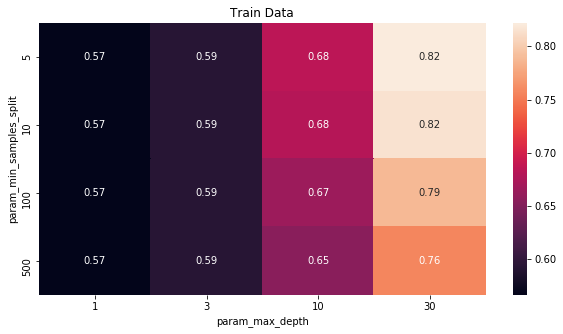

In [30]:
#Perform hyperparameter tuning and plot either heatmap or 3d plot.
#On Train data
temp = np.stack((GridSearch_clf.cv_results_['param_min_samples_split'],GridSearch_clf.cv_results_['param_max_depth'],GridSearch_clf.cv_results_['mean_train_score']),axis =1)
#print(temp)
scores = (pd.DataFrame(temp,columns = ['param_min_samples_split','param_max_depth','mean_test_score']).groupby(['param_min_samples_split','param_max_depth'])).max().unstack()
print(scores)
fig = plt.figure(figsize=(10,5))
sns.heatmap(scores.mean_test_score,annot = True)
plt.title("Train Data")
plt.show()

                        mean_test_score                              
param_max_depth                      1         3         10        30
param_min_samples_split                                              
5                              0.558818  0.563501  0.552823  0.532085
10                             0.558818  0.563501  0.553580  0.534968
100                            0.558818  0.563205  0.557313  0.546924
500                            0.558818  0.563223  0.575886  0.580103


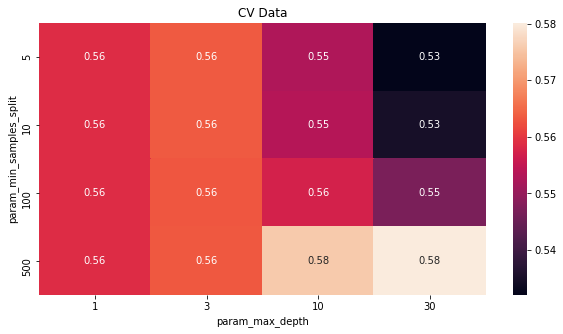

In [31]:
#Perform hyperparameter tuning and plot either heatmap or 3d plot.
#On CV data
temp = np.stack((GridSearch_clf.cv_results_['param_min_samples_split'],GridSearch_clf.cv_results_['param_max_depth'],GridSearch_clf.cv_results_['mean_test_score']),axis =1)
scores = (pd.DataFrame(temp,columns = ['param_min_samples_split','param_max_depth','mean_test_score']).groupby(['param_min_samples_split','param_max_depth'])).max().unstack()
print(scores)
fig = plt.figure(figsize=(10,5))
sns.heatmap(scores.mean_test_score,annot = True)
plt.title("CV Data")
plt.show()

In [32]:
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
# Re-fit the model with best parameters found
clf = DecisionTreeClassifier(max_depth = best_max_depth ,min_samples_split =best_min_samples_split )
clf.fit(X_train1_df,y_train1)



DecisionTreeClassifier(max_depth=30, min_samples_split=500)

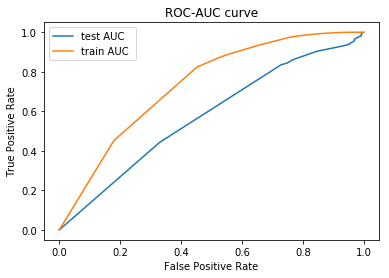

In [33]:
#create ROC curve

y_test_pred_proba = clf.predict_proba(X_test1_df)[::,1]
fpr_test, tpr_test, threshold_test = metrics.roc_curve(y_test1,  y_test_pred_proba)

y_train_pred_proba = clf.predict_proba(X_train1_df)[::,1]
fpr_train, tpr_train, threshold_train = metrics.roc_curve(y_train1,  y_train_pred_proba)

#roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(fpr_test,tpr_test,label="test AUC ")
plt.plot(fpr_train,tpr_train,label="train AUC ")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC-AUC curve")
plt.legend()
plt.show()
#print(threshold_test)
#print(y_pred_proba)



            Predicted:-ve  Predicted:+ve
Actaul:-ve              8            250
Actual:+ve             73           1669
***************confusion matrix***********************


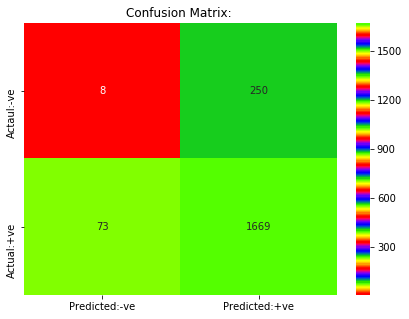

In [34]:
# 11. Plot confusion matrix based on best threshold value
y_pred = clf.predict(X_test1_df)
cm = confusion_matrix(y_test1,  y_pred)

cm_df =pd.DataFrame(cm,columns=["Predicted:-ve","Predicted:+ve"],index = ["Actaul:-ve","Actual:+ve"])
print(cm_df)
print("***************confusion matrix***********************")

fig = plt.figure(figsize=(7,5))
ax =sns.heatmap(cm_df,annot =True, xticklabels=True, yticklabels=True,cmap="prism",fmt="")
plt.title("Confusion Matrix: ")
plt.show()




In [35]:
# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.

indx_list = list()
for i in range(y_test1.shape[0]): 
    if (y_test1.values[i] == 0) & (y_pred[i] == 1):
        indx_list.append(y_test1.index[i])
        
#print("actual Y",y_test.values)
#print("pred Y",y_pred)
#print(y_test.index[3])

#print(len(y_test.index))
#print(y_test.index)

#print(len(X_test.index))
#print(X_test.index)
fp_essay = list()
fp_teacher_number_of_previously_posted_projects =list()
print("List of indices for false positive data points: ")
print(indx_list)

for i,ind in enumerate(indx_list):
    essay=data["essay"][data.index==ind].values[0]
    number_of_previously_posted_projects = data["teacher_number_of_previously_posted_projects"][data.index==ind].values[0]
    fp_essay.append(essay)
    fp_teacher_number_of_previously_posted_projects.append(number_of_previously_posted_projects)
print(" "*70)
print("List (sample (2)) of essays corresponding to false positive data poits: ")
print("-"*70)
print(fp_essay[0:2])

#word_count_list = [ len(fp_essay[i]) for i in range(len(fp_essay)) ]
#print()
#print("Word count of essays corresponding to false positive: ")
#print(word_count_list)

#essay_labels = ["essay "+str(i) for i in range(len(fp_essay))]
#fig = plt.figure(figsize = (20, 5))
#plt.bar(essay_labels,word_count_list,width =0.5)
#plt.xlabel("Essays corresponding to false positives")
#plt.ylabel("Word count")
#plt.title("False Positve Data points: Analysis")
#plt.show()




List of indices for false positive data points: 
[5795, 9617, 190, 302, 4124, 8242, 2492, 1693, 4540, 2847, 5876, 1726, 7825, 9806, 286, 8117, 1124, 1783, 3448, 3226, 7620, 9867, 6793, 7529, 6825, 2020, 7582, 4890, 9222, 3184, 2900, 7153, 1379, 8547, 1704, 5098, 964, 9382, 7618, 4413, 1694, 4512, 8181, 6441, 213, 1878, 7009, 6975, 2424, 9906, 8983, 4464, 5639, 5759, 9989, 4109, 5349, 474, 6853, 1034, 1371, 6940, 5466, 2155, 6472, 6732, 7694, 7748, 847, 4057, 16, 9795, 9634, 8698, 2149, 6422, 9975, 668, 6327, 8225, 9968, 4881, 6405, 8282, 268, 3807, 1282, 4175, 3346, 9350, 9547, 3608, 1329, 5338, 3639, 7709, 2227, 5305, 2792, 4879, 2703, 8655, 2318, 2055, 4004, 2333, 7587, 1293, 8054, 8598, 7889, 3043, 4340, 2889, 2691, 2154, 2081, 4286, 7635, 7897, 8069, 9586, 8298, 1365, 5152, 8468, 6626, 8853, 6703, 640, 5388, 4290, 8209, 9010, 7458, 3265, 2470, 8294, 233, 2361, 1361, 7212, 6258, 1894, 8200, 7824, 5568, 866, 1420, 7771, 7624, 1103, 7453, 4782, 4575, 4079, 3416, 2175, 7266, 7539, 9664

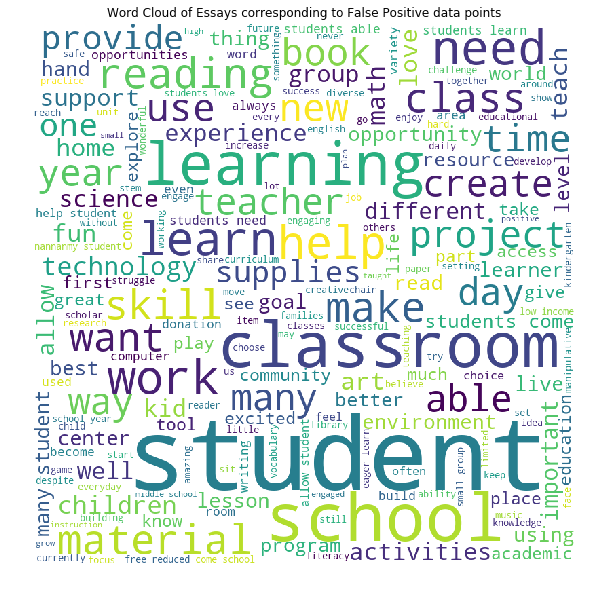

In [36]:
#plot wordcloud of essay text
#Ref: https://www.geeksforgeeks.org/generating-word-cloud-python/?msclkid=7d386f85ba3811ec95b39b1d46408e15
from wordcloud import WordCloud
#fp_essays_text is to store all words of essays corresponding to false positive data points in a str so we can find the word cloud of it.

fp_essays_text = str()
for i in fp_essay :
    fp_essays_text = fp_essays_text + i
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(fp_essays_text)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Word Cloud of Essays corresponding to False Positive data points")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



List of metric:teacher_number_of_previously_posted_projects corresponding to false positive data poits: 
----------------------------------------------------------------------
[14, 0, 0, 0, 89, 0, 0, 2, 1, 33, 1, 47, 1, 6, 2, 20, 0, 8, 12, 5, 8, 11, 2, 1, 0, 16, 2, 0, 0, 6, 4, 0, 2, 1, 6, 0, 3, 0, 8, 0, 0, 2, 0, 0, 100, 0, 0, 0, 18, 0, 6, 0, 36, 25, 0, 0, 0, 3, 29, 1, 2, 2, 13, 1, 0, 3, 6, 7, 2, 1, 2, 0, 6, 13, 118, 9, 1, 2, 0, 0, 2, 1, 47, 0, 0, 2, 4, 3, 6, 7, 0, 0, 1, 19, 2, 7, 15, 4, 2, 6, 0, 1, 14, 0, 0, 1, 4, 0, 3, 4, 0, 6, 3, 2, 0, 0, 0, 3, 3, 3, 0, 1, 0, 6, 0, 91, 2, 0, 0, 3, 0, 5, 0, 26, 3, 0, 17, 5, 1, 3, 33, 0, 3, 13, 8, 1, 2, 1, 0, 3, 0, 0, 9, 0, 1, 7, 0, 4, 16, 0, 3, 4, 12, 65, 24, 6, 8, 3, 0, 0, 88, 1, 2, 0, 0, 11, 2, 0, 7, 2, 0, 1, 0, 0, 0, 0, 0, 3, 12, 19, 0, 0, 1, 28, 14, 1, 1, 0, 1, 5, 2, 6, 5, 8, 13, 0, 5, 29, 0, 0, 49, 1, 12, 0, 0, 0, 1, 0, 34, 16, 3, 8, 3, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 16, 2, 15, 8, 11, 1, 0, 0, 3, 2, 94, 16, 0, 7, 25, 1, 1]


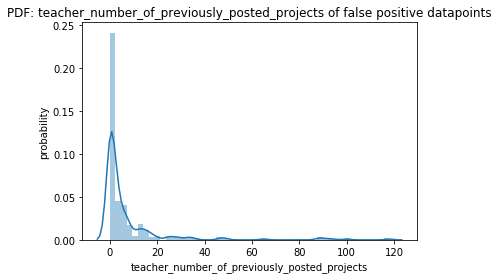

In [37]:
print()
print("List of metric:teacher_number_of_previously_posted_projects corresponding to false positive data poits: ")
print("-"*70)
print(fp_teacher_number_of_previously_posted_projects)
sns.distplot(fp_teacher_number_of_previously_posted_projects)
plt.title('PDF: teacher_number_of_previously_posted_projects of false positive datapoints')
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.show()


# 13. Write your observations about the wordcloud and pdf.
- {student,classroom,learning,school,...} These words found to be more frequent in the essays corresponded to False Positive data points.
- By analysis of PDF of "teacher_number_of_previously_posted_projects", we found that requests with teacher_number_of_previously_posted_projects = 0 are more likely to be classified as False Positive.


# Applying DecisionTree Classifier on data set 2 (i.e., TFIDF W2V) 

In [38]:
#The hyper paramter tuning (best depth in range [1, 3, 10, 30], and the best min_samples_split in range [5, 10, 100, 500])
#Find the best hyper parameter which will give the maximum AUC value
#find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)

clf = DecisionTreeClassifier(random_state =20)
clf.fit(X_train2_df,y_train2)

parameters = {'max_depth':[1, 3, 10, 30],'min_samples_split': [5, 10, 100, 500]}
GridSearch_clf = GridSearchCV(clf, parameters,scoring='roc_auc',cv =3,return_train_score=True)
GridSearch_clf.fit(X_train2_df, y_train2)

print(GridSearch_clf.score(X_train2_df,y_train2))
print("------------Best Hyperparameters----------------")
# print best parameter after tuning
print(GridSearch_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(GridSearch_clf.best_estimator_)

#print(GridSearch_clf.cv_results_)

best_max_depth = GridSearch_clf.best_params_['max_depth']

best_min_samples_split = GridSearch_clf.best_params_['min_samples_split']

0.7462765883006035
------------Best Hyperparameters----------------
{'max_depth': 10, 'min_samples_split': 500}
DecisionTreeClassifier(max_depth=10, min_samples_split=500, random_state=20)


                        mean_test_score                              
param_max_depth                      1         3         10        30
param_min_samples_split                                              
5                              0.560933  0.630545  0.847440  0.998471
10                             0.560933  0.630545  0.841556  0.995619
100                            0.560933  0.630545  0.778395  0.919273
500                            0.560933  0.625622  0.718436  0.763123


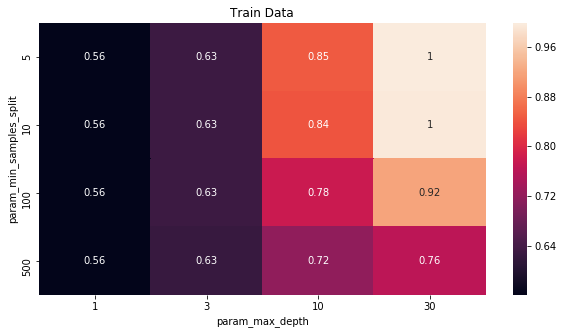

In [39]:
#Perform hyperparameter tuning and plot either heatmap or 3d plot.
#On Train data
temp = np.stack((GridSearch_clf.cv_results_['param_min_samples_split'],GridSearch_clf.cv_results_['param_max_depth'],GridSearch_clf.cv_results_['mean_train_score']),axis =1)
#print(temp)
scores = (pd.DataFrame(temp,columns = ['param_min_samples_split','param_max_depth','mean_test_score']).groupby(['param_min_samples_split','param_max_depth'])).max().unstack()
print(scores)
fig = plt.figure(figsize=(10,5))
sns.heatmap(scores.mean_test_score,annot = True)
plt.title("Train Data")
plt.show()

                        mean_test_score                              
param_max_depth                      1         3         10        30
param_min_samples_split                                              
5                              0.534309  0.562042  0.525449  0.527363
10                             0.534309  0.562042  0.544852  0.528118
100                            0.534309  0.562042  0.563491  0.555428
500                            0.534309  0.562379  0.582567  0.577762


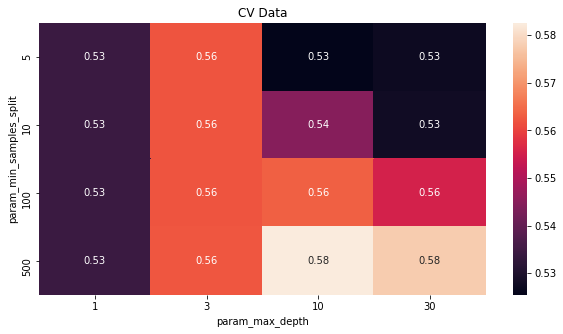

In [40]:
#Perform hyperparameter tuning and plot either heatmap or 3d plot.
#On CV data
temp = np.stack((GridSearch_clf.cv_results_['param_min_samples_split'],GridSearch_clf.cv_results_['param_max_depth'],GridSearch_clf.cv_results_['mean_test_score']),axis =1)
scores = (pd.DataFrame(temp,columns = ['param_min_samples_split','param_max_depth','mean_test_score']).groupby(['param_min_samples_split','param_max_depth'])).max().unstack()
print(scores)
fig = plt.figure(figsize=(10,5))
sns.heatmap(scores.mean_test_score,annot = True)
plt.title("CV Data")
plt.show()

In [41]:
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
# Re-fit the model with best parameters found
clf = DecisionTreeClassifier(max_depth = best_max_depth ,min_samples_split =best_min_samples_split )
clf.fit(X_train2_df,y_train2)


DecisionTreeClassifier(max_depth=10, min_samples_split=500)

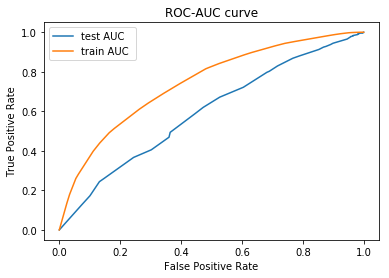

In [43]:
#create ROC curve

y_test_pred_proba = clf.predict_proba(X_test2_df)[::,1]
fpr_test, tpr_test, threshold_test = metrics.roc_curve(y_test2,  y_test_pred_proba)

y_train_pred_proba = clf.predict_proba(X_train2_df)[::,1]
fpr_train, tpr_train, threshold_train = metrics.roc_curve(y_train2,  y_train_pred_proba)

#roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(fpr_test,tpr_test,label="test AUC ")
plt.plot(fpr_train,tpr_train,label="train AUC ")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC-AUC curve")
plt.legend()
plt.show()
#print(threshold_test)
#print(y_pred_proba)



            Predicted:-ve  Predicted:+ve
Actaul:-ve              5            253
Actual:+ve             20           1722
***************confusion matrix***********************


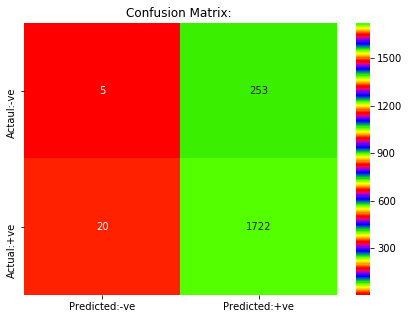

In [44]:
# 11. Plot confusion matrix based on best threshold value
y_pred = clf.predict(X_test2_df)
cm = confusion_matrix(y_test2,  y_pred)

cm_df =pd.DataFrame(cm,columns=["Predicted:-ve","Predicted:+ve"],index = ["Actaul:-ve","Actual:+ve"])
print(cm_df)
print("***************confusion matrix***********************")

fig = plt.figure(figsize=(7,5))
ax =sns.heatmap(cm_df,annot =True, xticklabels=True, yticklabels=True,cmap="prism",fmt="")
plt.title("Confusion Matrix: ")
plt.show()




In [45]:
# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.

indx_list = list()
for i in range(y_test2.shape[0]): 
    if (y_test2.values[i] == 0) & (y_pred[i] == 1):
        indx_list.append(y_test2.index[i])
        
#print("actual Y",y_test.values)
#print("pred Y",y_pred)
#print(y_test.index[3])

#print(len(y_test.index))
#print(y_test.index)

#print(len(X_test.index))
#print(X_test.index)
fp_essay = list()
fp_teacher_number_of_previously_posted_projects =list()
print("List of indices for false positive data points: ")
print(indx_list)

for i,ind in enumerate(indx_list):
    essay=data["essay"][data.index==ind].values[0]
    number_of_previously_posted_projects = data["teacher_number_of_previously_posted_projects"][data.index==ind].values[0]
    fp_essay.append(essay)
    fp_teacher_number_of_previously_posted_projects.append(number_of_previously_posted_projects)
print(" "*70)
print("List (sample (2)) of essays corresponding to false positive data poits: ")
print("-"*70)
print(fp_essay[0:2])

#word_count_list = [ len(fp_essay[i]) for i in range(len(fp_essay)) ]
#print()
#print("Word count of essays corresponding to false positive: ")
#print(word_count_list)

#essay_labels = ["essay "+str(i) for i in range(len(fp_essay))]
#fig = plt.figure(figsize = (20, 5))
#plt.bar(essay_labels,word_count_list,width =0.5)
#plt.xlabel("Essays corresponding to false positives")
#plt.ylabel("Word count")
#plt.title("False Positve Data points: Analysis")
#plt.show()




List of indices for false positive data points: 
[5795, 9617, 190, 302, 4124, 8242, 3083, 2492, 1693, 4540, 2847, 5876, 1726, 7825, 9806, 286, 8117, 1124, 5256, 1783, 3448, 3226, 7620, 9867, 6793, 7529, 6825, 2020, 7582, 4890, 9222, 3184, 2900, 7153, 1379, 8547, 1704, 5098, 964, 9382, 7618, 4413, 1694, 4512, 8181, 6441, 213, 1878, 7009, 6975, 2424, 9906, 8983, 6313, 4464, 7775, 5639, 5759, 9989, 4109, 5349, 474, 6853, 1034, 1371, 6940, 5466, 2155, 6472, 6732, 7694, 7748, 847, 4057, 16, 9795, 9634, 8698, 2149, 6422, 9975, 6327, 8225, 9968, 4881, 6405, 8282, 268, 3807, 9367, 1282, 4175, 3346, 9350, 9547, 3608, 5338, 3639, 7709, 2227, 5305, 2792, 4879, 2703, 8655, 2318, 2055, 4004, 2333, 7587, 1293, 8054, 8598, 7889, 3043, 4340, 2889, 2691, 2154, 2081, 1467, 4286, 7897, 8069, 9586, 8298, 1365, 5152, 8468, 6626, 8853, 6703, 640, 5388, 4290, 8209, 9010, 7458, 3265, 8294, 233, 2361, 7212, 6258, 1894, 8200, 7824, 5568, 866, 1420, 7771, 7624, 1103, 3849, 7453, 4782, 4575, 4079, 3416, 2175, 726

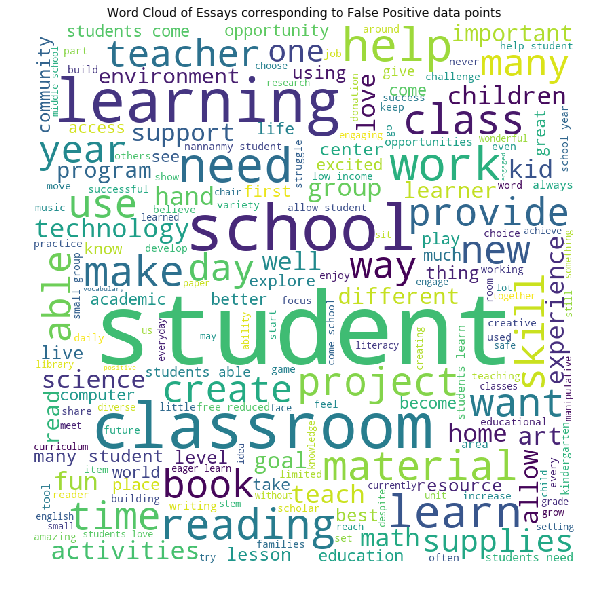

In [46]:
#plot wordcloud of essay text
#Ref: https://www.geeksforgeeks.org/generating-word-cloud-python/?msclkid=7d386f85ba3811ec95b39b1d46408e15
from wordcloud import WordCloud
#fp_essays_text is to store all words of essays corresponding to false positive data points in a str so we can find the word cloud of it.

fp_essays_text = str()
for i in fp_essay :
    fp_essays_text = fp_essays_text + i
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(fp_essays_text)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Word Cloud of Essays corresponding to False Positive data points")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



List of metric:teacher_number_of_previously_posted_projects corresponding to false positive data poits: 
----------------------------------------------------------------------
[14, 0, 0, 0, 89, 0, 0, 0, 2, 1, 33, 1, 47, 1, 6, 2, 20, 0, 72, 8, 12, 5, 8, 11, 2, 1, 0, 16, 2, 0, 0, 6, 4, 0, 2, 1, 6, 0, 3, 0, 8, 0, 0, 2, 0, 0, 100, 0, 0, 0, 18, 0, 6, 0, 0, 5, 36, 25, 0, 0, 0, 3, 29, 1, 2, 2, 13, 1, 0, 3, 6, 7, 2, 1, 2, 0, 6, 13, 118, 9, 1, 0, 0, 2, 1, 47, 0, 0, 2, 3, 4, 3, 6, 7, 0, 0, 19, 2, 7, 15, 4, 2, 6, 0, 1, 14, 0, 0, 1, 4, 0, 3, 4, 0, 6, 3, 2, 0, 0, 0, 6, 3, 3, 0, 1, 0, 6, 0, 91, 2, 0, 0, 3, 0, 5, 0, 26, 3, 0, 5, 1, 3, 0, 3, 13, 8, 1, 2, 1, 0, 3, 0, 0, 0, 9, 0, 1, 7, 0, 4, 16, 0, 3, 4, 12, 65, 24, 6, 8, 3, 0, 0, 88, 1, 2, 0, 0, 11, 2, 0, 7, 2, 0, 1, 0, 0, 0, 0, 0, 3, 12, 19, 0, 0, 1, 28, 14, 1, 1, 0, 1, 5, 2, 6, 5, 8, 13, 0, 5, 29, 0, 0, 49, 1, 12, 0, 0, 0, 1, 0, 34, 16, 3, 8, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 16, 2, 15, 8, 11, 1, 0, 0, 3, 2, 94, 16, 0, 7, 25, 1, 1]


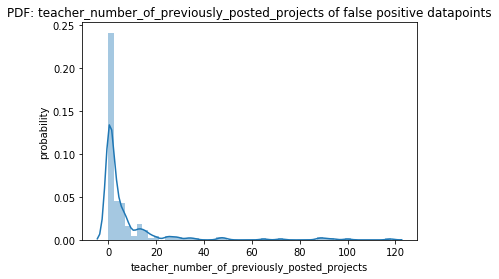

In [47]:
print()
print("List of metric:teacher_number_of_previously_posted_projects corresponding to false positive data poits: ")
print("-"*70)
print(fp_teacher_number_of_previously_posted_projects)
sns.distplot(fp_teacher_number_of_previously_posted_projects)
plt.title('PDF: teacher_number_of_previously_posted_projects of false positive datapoints')
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.show()


# 13. Write your observations about the wordcloud and pdf.
- {student,classroom,learning,school,...} These words found to be more frequent in the essays corresponded to False Positive data points.
- By analysis of PDF of "teacher_number_of_previously_posted_projects", we found that requests with teacher_number_of_previously_posted_projects = 0 are more likely to be classified as False Positive.

# <font color='red'> <b>Task - 2</b></font>

In [81]:
#For this task consider set-1 features.

#Select all the features which are having non-zero feature importance.
#You can get the feature importance using 'feature_importances_` (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
#You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3
#Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.

In [82]:
#Dataset1

clf = DecisionTreeClassifier()
clf.fit(X_train1_df,y_train1)

DecisionTreeClassifier()

In [83]:
print("Feature Importance: ")
print(clf.feature_importances_)

Feature Importance: 
[0.         0.         0.         ... 0.         0.01270432 0.00973973]


In [84]:
feature_indicies = []
print("Feature index and its corresponding non-zero feature importance")
for i,feature_weight in enumerate(clf.feature_importances_):
    if(feature_weight != 0):
        feature_indicies.append(i)
        print(i,feature_weight)

Feature index and its corresponding non-zero feature importance
4 0.0023769057174800974
29 0.0007774925244093778
60 0.005822555127243563
75 0.0011662387866140664
107 0.0024549411618181092
111 0.0010181029705534554
198 0.0030072786825789976
200 0.006686484106591947
206 0.0010022194833447416
211 0.000888562885039289
214 0.0017878126731509646
221 0.0025274677618895326
236 0.0018458986809339441
245 0.0015983750266399348
254 0.0010268564167567867
264 0.0018423415772472465
268 0.0018700180917155557
279 0.001025264867353025
283 0.0010076632149232066
289 0.0013181856393747029
296 0.0009774003216570164
299 0.0010225820809396647
300 0.0028288549330854995
331 0.001245862305974241
338 0.001009006966984331
358 0.0009905328140189787
370 0.003288202302063519
376 0.0019248446978412067
412 0.0010074724266846892
414 0.0005183283496062518
439 0.0007774925244093778
446 0.0010029765006714369
451 0.0010039658903860183
453 0.0011995329346847733
466 0.0010136000529756173
467 0.0038030777651303148
469 0.001004

In [85]:
# Limiting features for xtrain dataset with non zero features
print("Found "+str(len(feature_indicies))+" features with zero feature importance")
print("Xtrain data before removing zero weighted features")
print(X_train1_df.shape)

#Rename colums with feature indices for mathematical ease
#Ref: https://saugatach.github.io/2022/03/31/3-ways-to-rename-columns-of-a-pandas-dataframe.html#:~:text=%203%20ways%20to%20rename%20columns%20of%20a,process...%203%20The%20regular%20expression%20approach%20More%20?msclkid=4d3569fbba8611ec95642f37ee146257
dataset_with_limited_features = X_train1_df.copy()
column_list =X_train1_df.columns
column_list_new =[i for i in range(X_train1_df.shape[1])]
mapping = {key1: key2 for key1, key2 in zip(column_list, column_list_new)}

dataset_with_limited_features=dataset_with_limited_features.rename(columns = mapping )
X_train3=dataset_with_limited_features.drop(feature_indicies,axis=1)

#Ytrain doest change
y_train3 = y_train1

print("X train data after removing zero weighted features")
print(X_train3.shape)


Found 556 features with zero feature importance
Xtrain data before removing zero weighted features
(8000, 5717)
X train data after removing zero weighted features
(8000, 5161)


In [86]:
# Limiting features for xtrain dataset with non zero features
print("Found "+str(len(feature_indicies))+" features with zero feature importance")
print("Xtest data before removing zero weighted features")
print(X_test1_df.shape)

#Rename colums with feature indices for mathematical ease
#Ref: https://saugatach.github.io/2022/03/31/3-ways-to-rename-columns-of-a-pandas-dataframe.html#:~:text=%203%20ways%20to%20rename%20columns%20of%20a,process...%203%20The%20regular%20expression%20approach%20More%20?msclkid=4d3569fbba8611ec95642f37ee146257
dataset_with_limited_features = X_test1_df.copy()
column_list =X_test1_df.columns
column_list_new =[i for i in range(X_test1_df.shape[1])]
mapping = {key1: key2 for key1, key2 in zip(column_list, column_list_new)}

dataset_with_limited_features=dataset_with_limited_features.rename(columns = mapping )
X_test3=dataset_with_limited_features.drop(feature_indicies,axis=1)

#Ytest doest change
y_test3 = y_test1

print("X test data after removing zero weighted features")
print(X_test3.shape)


Found 556 features with zero feature importance
Xtest data before removing zero weighted features
(2000, 5717)
X test data after removing zero weighted features
(2000, 5161)


In [92]:
#The hyper paramter tuning (best depth in range [1, 3, 10, 30], and the best min_samples_split in range [5, 10, 100, 500])
#Find the best hyper parameter which will give the maximum AUC value
#find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)

clf = DecisionTreeClassifier(random_state =20)
clf.fit(X_train3,y_train3)

parameters = {'max_depth':[1, 3, 10, 30],'min_samples_split': [5, 10, 100, 500]}
GridSearch_clf = GridSearchCV(clf, parameters,scoring='roc_auc',cv =3,return_train_score=True)
GridSearch_clf.fit(X_train3, y_train3)

print(GridSearch_clf.score(X_train3,y_train3))
print("------------Best Hyperparameters----------------")
# print best parameter after tuning
print(GridSearch_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(GridSearch_clf.best_estimator_)

#print(GridSearch_clf.cv_results_)

best_max_depth = GridSearch_clf.best_params_['max_depth']

best_min_samples_split = GridSearch_clf.best_params_['min_samples_split']

0.6543340802444851
------------Best Hyperparameters----------------
{'max_depth': 30, 'min_samples_split': 500}
DecisionTreeClassifier(max_depth=30, min_samples_split=500, random_state=20)


                        mean_test_score                              
param_max_depth                      1         3         10        30
param_min_samples_split                                              
5                              0.512354  0.530537  0.598050  0.723746
10                             0.512354  0.530323  0.596387  0.718930
100                            0.512354  0.529389  0.583022  0.692939
500                            0.512354  0.529312  0.581768  0.666660


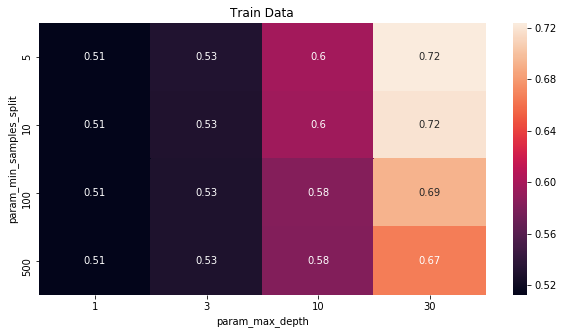

In [93]:
#Perform hyperparameter tuning and plot either heatmap or 3d plot.
#On Train data
temp = np.stack((GridSearch_clf.cv_results_['param_min_samples_split'],GridSearch_clf.cv_results_['param_max_depth'],GridSearch_clf.cv_results_['mean_train_score']),axis =1)
#print(temp)
scores = (pd.DataFrame(temp,columns = ['param_min_samples_split','param_max_depth','mean_test_score']).groupby(['param_min_samples_split','param_max_depth'])).max().unstack()
print(scores)
fig = plt.figure(figsize=(10,5))
sns.heatmap(scores.mean_test_score,annot = True)
plt.title("Train Data")
plt.show()

                        mean_test_score                              
param_max_depth                      1         3         10        30
param_min_samples_split                                              
5                              0.502351  0.505106  0.506903  0.512696
10                             0.502351  0.504962  0.505744  0.510273
100                            0.502351  0.505507  0.520413  0.519122
500                            0.502351  0.505536  0.520590  0.527791


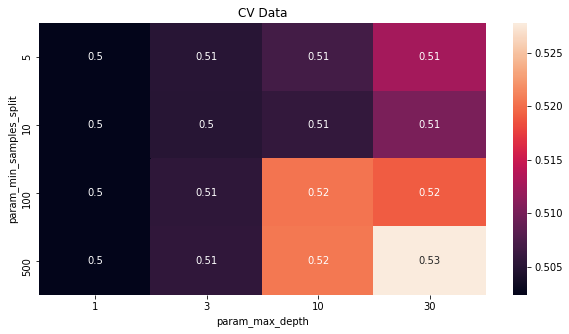

In [94]:
#Perform hyperparameter tuning and plot either heatmap or 3d plot.
#On CV data
temp = np.stack((GridSearch_clf.cv_results_['param_min_samples_split'],GridSearch_clf.cv_results_['param_max_depth'],GridSearch_clf.cv_results_['mean_test_score']),axis =1)
scores = (pd.DataFrame(temp,columns = ['param_min_samples_split','param_max_depth','mean_test_score']).groupby(['param_min_samples_split','param_max_depth'])).max().unstack()
print(scores)
fig = plt.figure(figsize=(10,5))
sns.heatmap(scores.mean_test_score,annot = True)
plt.title("CV Data")
plt.show()

In [95]:
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
# Re-fit the model with best parameters found
clf = DecisionTreeClassifier(max_depth = best_max_depth ,min_samples_split =best_min_samples_split )
clf.fit(X_train3,y_train3)


DecisionTreeClassifier(max_depth=30, min_samples_split=500)

(2000,) (2000,)


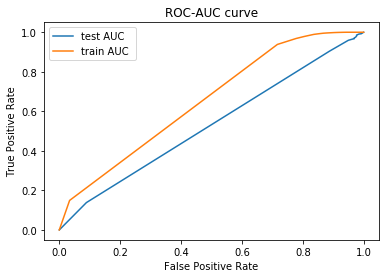

In [96]:
#create ROC curve

y_test_pred_proba = clf.predict_proba(X_test3)[::,1]
print(y_test3.shape,y_test_pred_proba.shape)
fpr_test, tpr_test, threshold_test = metrics.roc_curve(y_test3,  y_test_pred_proba)

y_train_pred_proba = clf.predict_proba(X_train3)[::,1]
fpr_train, tpr_train, threshold_train = metrics.roc_curve(y_train3,  y_train_pred_proba)

#roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(fpr_test,tpr_test,label="test AUC ")
plt.plot(fpr_train,tpr_train,label="train AUC ")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC-AUC curve")
plt.legend()
plt.show()
#print(threshold_test)
#print(y_pred_proba)



            Predicted:-ve  Predicted:+ve
Actaul:-ve              8            250
Actual:+ve             50           1692
***************confusion matrix***********************


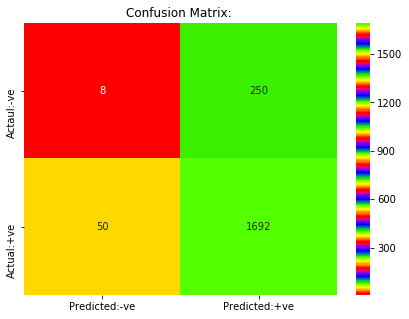

In [97]:
# 11. Plot confusion matrix based on best threshold value
y_pred = clf.predict(X_test3)
cm = confusion_matrix(y_test3,  y_pred)

cm_df =pd.DataFrame(cm,columns=["Predicted:-ve","Predicted:+ve"],index = ["Actaul:-ve","Actual:+ve"])
print(cm_df)
print("***************confusion matrix***********************")

fig = plt.figure(figsize=(7,5))
ax =sns.heatmap(cm_df,annot =True, xticklabels=True, yticklabels=True,cmap="prism",fmt="")
plt.title("Confusion Matrix: ")
plt.show()




In [98]:
# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.

indx_list = list()
for i in range(y_test3.shape[0]): 
    if (y_test3.values[i] == 0) & (y_pred[i] == 1):
        indx_list.append(y_test3.index[i])
        
#print("actual Y",y_test.values)
#print("pred Y",y_pred)
#print(y_test.index[3])

#print(len(y_test.index))
#print(y_test.index)

#print(len(X_test.index))
#print(X_test.index)
fp_essay = list()
fp_teacher_number_of_previously_posted_projects =list()
print("List of indices for false positive data points: ")
print(indx_list)

for i,ind in enumerate(indx_list):
    essay=data["essay"][data.index==ind].values[0]
    number_of_previously_posted_projects = data["teacher_number_of_previously_posted_projects"][data.index==ind].values[0]
    fp_essay.append(essay)
    fp_teacher_number_of_previously_posted_projects.append(number_of_previously_posted_projects)
print(" "*70)
print("List (sample (2)) of essays corresponding to false positive data poits: ")
print("-"*70)
print(fp_essay[0:2])

#word_count_list = [ len(fp_essay[i]) for i in range(len(fp_essay)) ]
#print()
#print("Word count of essays corresponding to false positive: ")
#print(word_count_list)

#essay_labels = ["essay "+str(i) for i in range(len(fp_essay))]
#fig = plt.figure(figsize = (20, 5))
#plt.bar(essay_labels,word_count_list,width =0.5)
#plt.xlabel("Essays corresponding to false positives")
#plt.ylabel("Word count")
#plt.title("False Positve Data points: Analysis")
#plt.show()




List of indices for false positive data points: 
[5795, 9617, 190, 302, 4124, 8242, 3083, 1693, 4540, 2847, 5876, 1726, 7825, 9806, 286, 8117, 1124, 5256, 1783, 3448, 7620, 9867, 6793, 7529, 6825, 2020, 7582, 4890, 9222, 3184, 2900, 7153, 1379, 8547, 1704, 5098, 964, 9382, 7618, 4413, 1694, 4512, 8181, 213, 1878, 7009, 6975, 2424, 9906, 8983, 6313, 4464, 7775, 5639, 5759, 9989, 4109, 5349, 474, 6853, 1034, 1371, 6940, 2155, 6472, 6732, 7694, 7748, 847, 4057, 16, 9795, 9634, 8698, 2149, 6422, 9975, 668, 6327, 8225, 9968, 4881, 6405, 8282, 268, 3807, 9367, 1282, 4175, 3346, 9350, 9547, 3608, 1329, 5338, 3639, 7709, 2227, 5305, 2792, 4879, 2703, 8655, 2318, 4004, 2333, 7587, 1293, 8054, 8598, 7889, 3043, 4340, 2889, 2691, 2154, 2081, 1467, 4286, 7635, 7897, 8069, 9586, 8298, 1365, 5152, 8468, 6626, 8853, 6703, 640, 5388, 4290, 8209, 9010, 7458, 3265, 2470, 8294, 233, 2361, 1361, 7212, 6258, 1894, 8200, 7824, 5568, 866, 1420, 7771, 7624, 1103, 3849, 7453, 4782, 4575, 4079, 3416, 2175, 7266

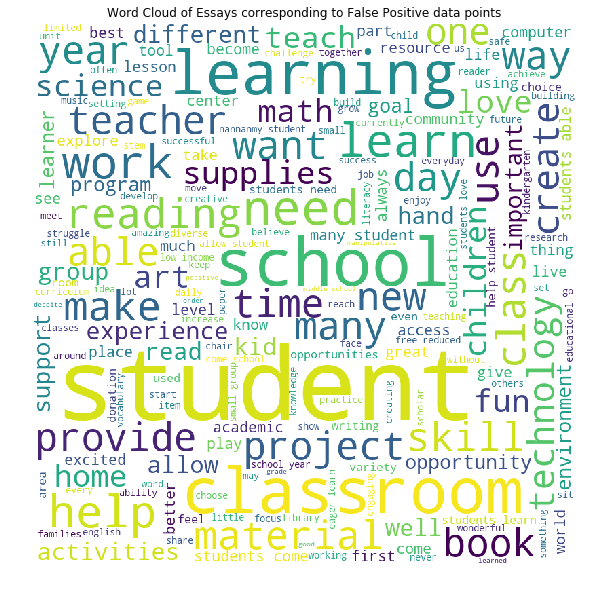

In [99]:
#plot wordcloud of essay text
#Ref: https://www.geeksforgeeks.org/generating-word-cloud-python/?msclkid=7d386f85ba3811ec95b39b1d46408e15
from wordcloud import WordCloud
#fp_essays_text is to store all words of essays corresponding to false positive data points in a str so we can find the word cloud of it.

fp_essays_text = str()
for i in fp_essay :
    fp_essays_text = fp_essays_text + i
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(fp_essays_text)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Word Cloud of Essays corresponding to False Positive data points")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



List of metric:teacher_number_of_previously_posted_projects corresponding to false positive data poits: 
----------------------------------------------------------------------
[14, 0, 0, 0, 89, 0, 0, 2, 1, 33, 1, 47, 1, 6, 2, 20, 0, 72, 8, 12, 8, 11, 2, 1, 0, 16, 2, 0, 0, 6, 4, 0, 2, 1, 6, 0, 3, 0, 8, 0, 0, 2, 0, 100, 0, 0, 0, 18, 0, 6, 0, 0, 5, 36, 25, 0, 0, 0, 3, 29, 1, 2, 2, 1, 0, 3, 6, 7, 2, 1, 2, 0, 6, 13, 118, 9, 1, 2, 0, 0, 2, 1, 47, 0, 0, 2, 3, 4, 3, 6, 7, 0, 0, 1, 19, 2, 7, 15, 4, 2, 6, 0, 1, 14, 0, 1, 4, 0, 3, 4, 0, 6, 3, 2, 0, 0, 0, 6, 3, 3, 3, 0, 1, 0, 6, 0, 91, 2, 0, 0, 3, 0, 5, 0, 26, 3, 0, 17, 5, 1, 3, 33, 0, 3, 13, 8, 1, 2, 1, 0, 3, 0, 0, 0, 9, 0, 1, 7, 0, 4, 16, 0, 3, 4, 12, 65, 24, 6, 8, 3, 0, 0, 88, 1, 2, 0, 0, 11, 2, 0, 7, 2, 0, 1, 0, 0, 0, 0, 0, 3, 12, 19, 0, 0, 1, 28, 14, 1, 1, 1, 5, 6, 5, 8, 13, 0, 5, 29, 0, 0, 49, 1, 12, 0, 0, 0, 1, 0, 34, 16, 3, 8, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 16, 2, 15, 8, 11, 0, 0, 3, 2, 94, 16, 0, 7, 25, 1, 1]


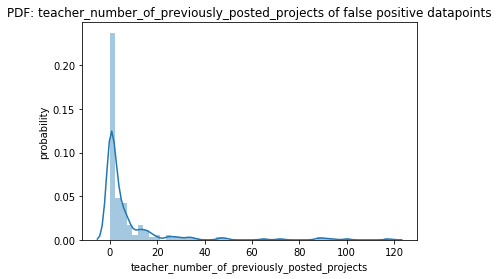

In [100]:
print()
print("List of metric:teacher_number_of_previously_posted_projects corresponding to false positive data poits: ")
print("-"*70)
print(fp_teacher_number_of_previously_posted_projects)
sns.distplot(fp_teacher_number_of_previously_posted_projects)
plt.title('PDF: teacher_number_of_previously_posted_projects of false positive datapoints')
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.show()


# 13. Write your observations about the wordcloud and pdf.
- {student,classroom,learning,school,...} These words found to be more frequent in the essays corresponded to False Positive data points.
- By analysis of PDF of "teacher_number_of_previously_posted_projects", we found that requests with teacher_number_of_previously_posted_projects = 0 are more likely to be classified as False Positive.

# Observation (For all data sets)
- Both tasks, i.e., with TFIDF processed text and TFIDF-W2V processed text (essay) resulted in different results interms of choosing best parameters,confusion matrix, word-cloud.
- TFIDF-W2V processed text gave better AUC Score (0.746) compared to TFIDF AUC score (0.734)
- Also, TFIDF-W2V resulted in less no of vector length(i.e., only 300) after text to vector convertion which has a edge over the other method with regards to memory and time complexity
- {student,classroom,learning,school,...} These words found to be more frequent in the essays corresponded to False Positive data points in both tasks.
- By analysis of PDF of "teacher_number_of_previously_posted_projects", we found that requests with teacher_number_of_previously_posted_projects = 0 are more likely to be classified as False Positive in both tasks.
# Regarding non-zero feature set:
- By removing zero features, we arrived at dimensional set for analysis (i.e., 556 zero features removed).Therefore, increasing memory and computationl time
- One main observation TPR improved relative to TFIDF data set

In [102]:
#!pip install prettytable
# Tabulate your results
# Please compare all your models using Prettytable library
#Ref: https://pypi.org/project/prettytable/?msclkid=31b07eccba8911ec909d9465bafb9d1e
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= (" Vectorizer ", " Max_depth ", " Min_sample_split "," Best -AUC ", "No of False Positives")
tb.add_row([" Tf - Idf", 30 , 500 ,0.734,250 ])
tb.add_row([" AVG-W2V", 10, 500,0.746, 253])
tb.add_row(["Non-Zero Features", 30, 500 ,0.67, 250])
print(tb.get_string(title = "Decision trees- Observations")) 

+--------------------------------------------------------------------------------------------+
|                                Decision trees- Observations                                |
+-------------------+-------------+--------------------+-------------+-----------------------+
|     Vectorizer    |  Max_depth  |  Min_sample_split  |  Best -AUC  | No of False Positives |
+-------------------+-------------+--------------------+-------------+-----------------------+
|      Tf - Idf     |      30     |        500         |    0.734    |          250          |
|       AVG-W2V     |      10     |        500         |    0.746    |          253          |
| Non-Zero Features |      30     |        500         |     0.67    |          250          |
+-------------------+-------------+--------------------+-------------+-----------------------+
